# **Работаем с данными**

## **Проверяем два дата сета на уровень печальности данных**

In [1]:
import pandas as pd

# Загрузка данных
train_df = pd.read_csv(r'C:\Users\User\Desktop\Get_n_mark_data\task8\train.csv')
test_df = pd.read_csv(r'C:\Users\User\Desktop\Get_n_mark_data\task8\test.csv')

# Проверка первых строк обоих датасетов
train_df.head(), test_df.head()


(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [4]:
# Подсчет отсутствующих значений
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

# Оставляем только те столбцы, где есть пропуски
train_missing = train_missing[train_missing > 0].reset_index()
test_missing = test_missing[test_missing > 0].reset_index()

# Переименовываем столбцы для ясности
train_missing.columns = ['Column', 'Missing_Values_train']
test_missing.columns = ['Column', 'Missing_Values_test']

# Выводим таблицы
train_missing, test_missing

(          Column  Missing_Values_train
 0    LotFrontage                   259
 1          Alley                  1369
 2     MasVnrType                     8
 3     MasVnrArea                     8
 4       BsmtQual                    37
 5       BsmtCond                    37
 6   BsmtExposure                    38
 7   BsmtFinType1                    37
 8   BsmtFinType2                    38
 9     Electrical                     1
 10   FireplaceQu                   690
 11    GarageType                    81
 12   GarageYrBlt                    81
 13  GarageFinish                    81
 14    GarageQual                    81
 15    GarageCond                    81
 16        PoolQC                  1453
 17         Fence                  1179
 18   MiscFeature                  1406,
           Column  Missing_Values_test
 0       MSZoning                    4
 1    LotFrontage                  227
 2          Alley                 1352
 3      Utilities                    2
 4  

более грязным выглядит дата сет test, далее работаем с ним. 

## **заполняем числовые пропуски**

In [5]:
# Заполняем числовые пропуски
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(0)
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(0)
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(0)
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(0)
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(0)
test_df['GarageCars'] = test_df['GarageCars'].fillna(0)
test_df['GarageArea'] = test_df['GarageArea'].fillna(0)

## **заполняем категориальные пропуски**

In [6]:
# Заполняем категориальные пропуски
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['Alley'] = test_df['Alley'].fillna('None')
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('None')
test_df['BsmtCond'] = test_df['BsmtCond'].fillna('None')
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('None')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('None')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('None')
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('None')
test_df['GarageType'] = test_df['GarageType'].fillna('None')
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('None')
test_df['GarageQual'] = test_df['GarageQual'].fillna('None')
test_df['GarageCond'] = test_df['GarageCond'].fillna('None')
test_df['PoolQC'] = test_df['PoolQC'].fillna('None')
test_df['Fence'] = test_df['Fence'].fillna('None')
test_df['MiscFeature'] = test_df['MiscFeature'].fillna('None')
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

## **проверяем, что получилось**

In [7]:
test_df.isnull().sum().sum()  # Если результат 0, значит, пропусков нет

11

видим 11 пропусков, посмотрим где они

In [8]:
# Поиск столбцов, в которых остались пропуски
missing_data = test_df.isnull().sum()
missing_data[missing_data > 0]

Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
dtype: int64

Utilities: Вероятно, можно заполнить самым частым значением (модой).
Exterior1st и Exterior2nd: Это внешние материалы дома, которые можно также заполнить модой.
BsmtFullBath и BsmtHalfBath: Логично предположить, что пропуски здесь можно заполнить "0", если в доме нет подвала с ванной.
KitchenQual: Качество кухни можно заполнить модой.
Functional: Эта колонка описывает функциональность дома, заполним её модой.

In [9]:
# Заполняем оставшиеся пропуски
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(0)
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(0)
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])

In [10]:
missing_data = test_df.isnull().sum()
missing_data[missing_data > 0]

Series([], dtype: int64)

теперь порядок.

## **Проверяем на дубликаты**

In [11]:
# Проверяем на дубликаты
duplicate_rows = test_df[test_df.duplicated()]
duplicate_rows  # Если таблица пустая, значит, дубликатов нет

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


вроде порядок

## **Преобразуем данные**

In [12]:
# Преобразуем некоторые категориальные данные в числовые (при необходимости)
# Например, можно применить label encoding или one-hot encoding для категориальных столбцов
categorical_cols = test_df.select_dtypes(include=['object']).columns
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Проверим типы данных
test_df.dtypes

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 242, dtype: object

# **Начинаем разведку**

## **Анализ распределения числовых переменных**

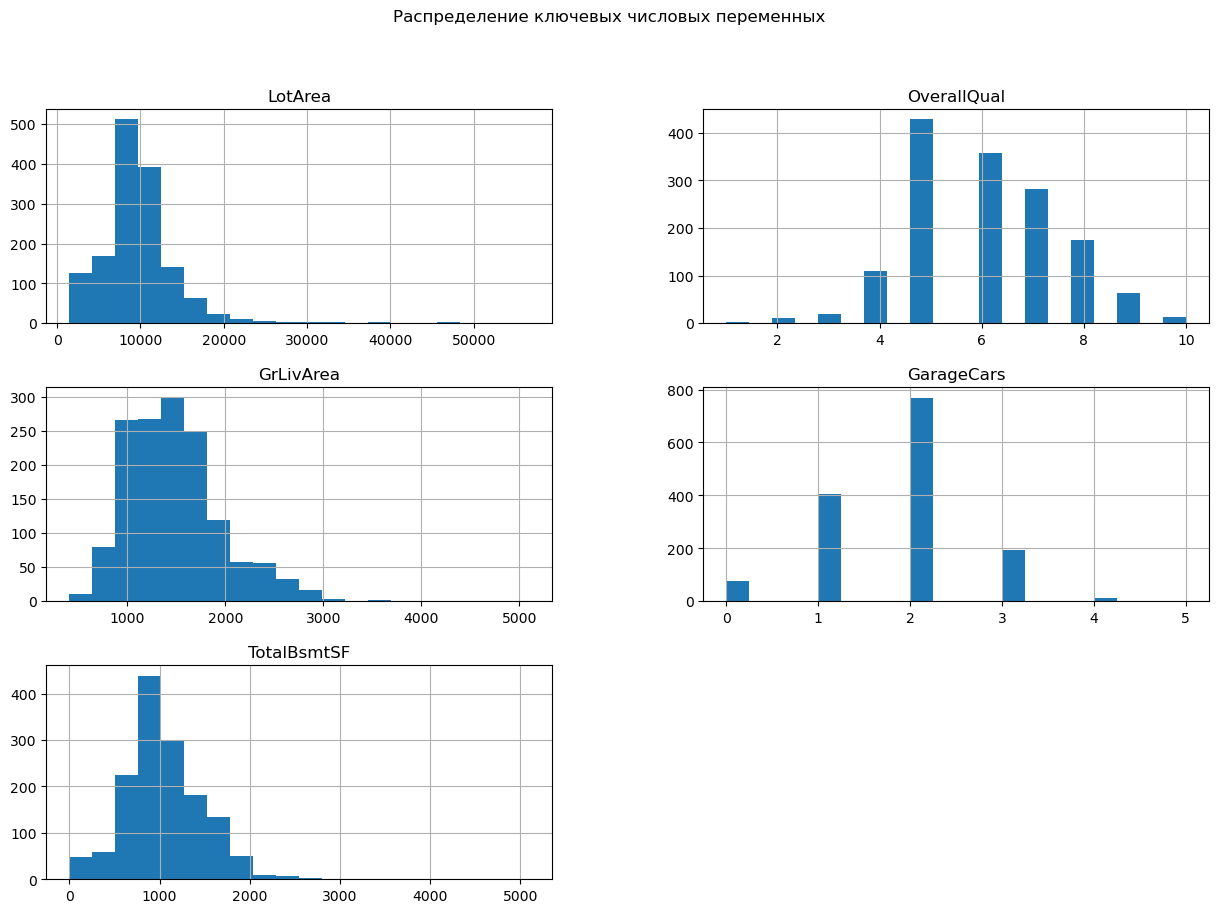

In [13]:
import matplotlib.pyplot as plt

# Список ключевых числовых признаков для анализа
numerical_cols = ['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

# Построение гистограмм для каждого признака
test_df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Распределение ключевых числовых переменных')
plt.show()


1. LotArea (Площадь участка):

* Большинство значений сосредоточено в диапазоне до 20,000, что говорит о типичных размерах участков для большинства объектов недвижимости.
* Наблюдаются выбросы — участки с большими площадями (более 50,000), но таких случаев немного, информация может быть корректной учитывая локации.

2. OverallQual (Общее качество строительства):

* Распределение слегка скошено в сторону высоких значений.
* Большинство объектов имеют рейтинг качества от 5 до 7, что говорит о хорошем уровне качества для большинства домов.
* Есть незначительное количество объектов с рейтингами ниже 4 и выше 8.

3. GrLivArea (Жилая площадь):

* Распределение близко к нормальному с легким смещением вправо.
* Большинство домов имеют жилую площадь от 1,000 до 2,500 квадратных футов.
* Как и в случае с LotArea, есть выбросы — объекты с очень большой жилой площадью (более 4,000), но таких немного, так что может быть информация корректна.

4. GarageCars (Количество машин в гараже):

* Основное количество объектов рассчитано на 1-2 машины в гараже.
* Небольшое количество домов с гаражами на 3 и более машин.
* Есть выбросы, где гаража нет совсем, но это может быть и не выборос, а объективные данные

5. TotalBsmtSF (Общая площадь подвала):

* Как и с жилой площадью, распределение близко к нормальному.
* Большинство объектов имеют подвал площадью до 2,000 квадратных футов.
* Есть выбросы с большими площадями подвала. Но хэй, это США, можети бомбоубежища

# **Корреляционный анализ**

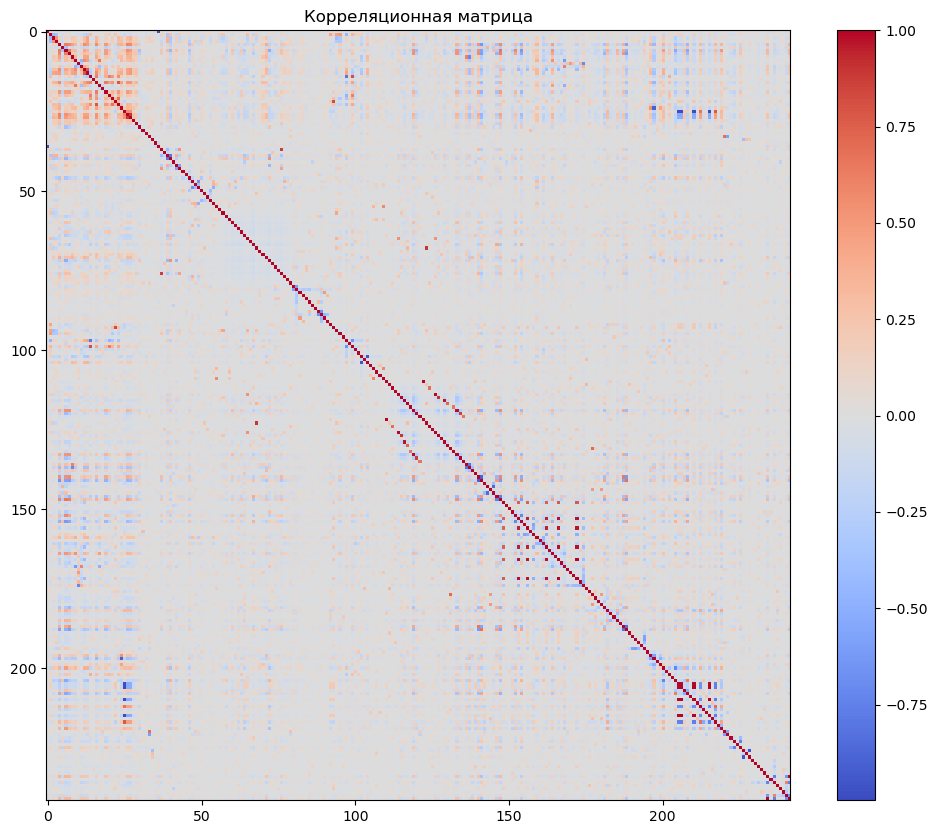

In [14]:
# Корреляционная матрица для всех числовых признаков
correlation_matrix = test_df.corr()

# Отображение матрицы корреляции с увеличением значений
plt.figure(figsize=(12, 10))
plt.title('Корреляционная матрица')
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.show()

In [16]:
# Вычисляем абсолютное значение корреляций и сортируем их
corr_pairs = correlation_matrix.unstack().abs().sort_values(ascending=False)

# Убираем дубликаты (корреляция признака с самим собой)
corr_pairs = corr_pairs[corr_pairs != 1]

# Отбираем топ-10 наибольших корреляций между признаками
corr_pairs.head(10)


GarageCond_None      GarageYrBlt            0.998335
GarageQual_None      GarageYrBlt            0.998335
GarageYrBlt          GarageCond_None        0.998335
                     GarageQual_None        0.998335
                     GarageFinish_None      0.998335
GarageFinish_None    GarageYrBlt            0.998335
Exterior1st_CemntBd  Exterior2nd_CmentBd    0.992039
Exterior2nd_CmentBd  Exterior1st_CemntBd    0.992039
GarageCond_None      GarageType_None        0.986382
GarageType_None      GarageFinish_None      0.986382
dtype: float64

видим жесткую корреляцию по облицовке, думаю, что можно её просто в один признак собрать

In [17]:
# Создаем новый признак для общей облицовки дома как среднее значение между Exterior1st и Exterior2nd
# Примем значение 1 для домов с одинаковой облицовкой и 0.5 для тех, у кого разные материалы
test_df['Exterior_Combined'] = (test_df['Exterior1st_CemntBd'] + test_df['Exterior2nd_CmentBd']) / 2

# Удаление сильно коррелированных признаков для гаражных характеристик
cols_to_drop = [
    'GarageCond_None', 
    'GarageQual_None', 
    'GarageFinish_None', 
    'GarageType_None', 
    'Exterior1st_CemntBd', 
    'Exterior2nd_CmentBd'
]

# Удаляем дублирующие признаки
test_df = test_df.drop(columns=cols_to_drop)

# Проверка результата
test_df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Exterior_Combined
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,1,0,0.0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,1,0,0.0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,1,0,0.0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,1,0,0.0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,1,0,0.0


In [18]:
# Проверяем, что признаки успешно удалены, а новый признак создан
test_df[['Exterior_Combined']].head()

,Exterior_Combined
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


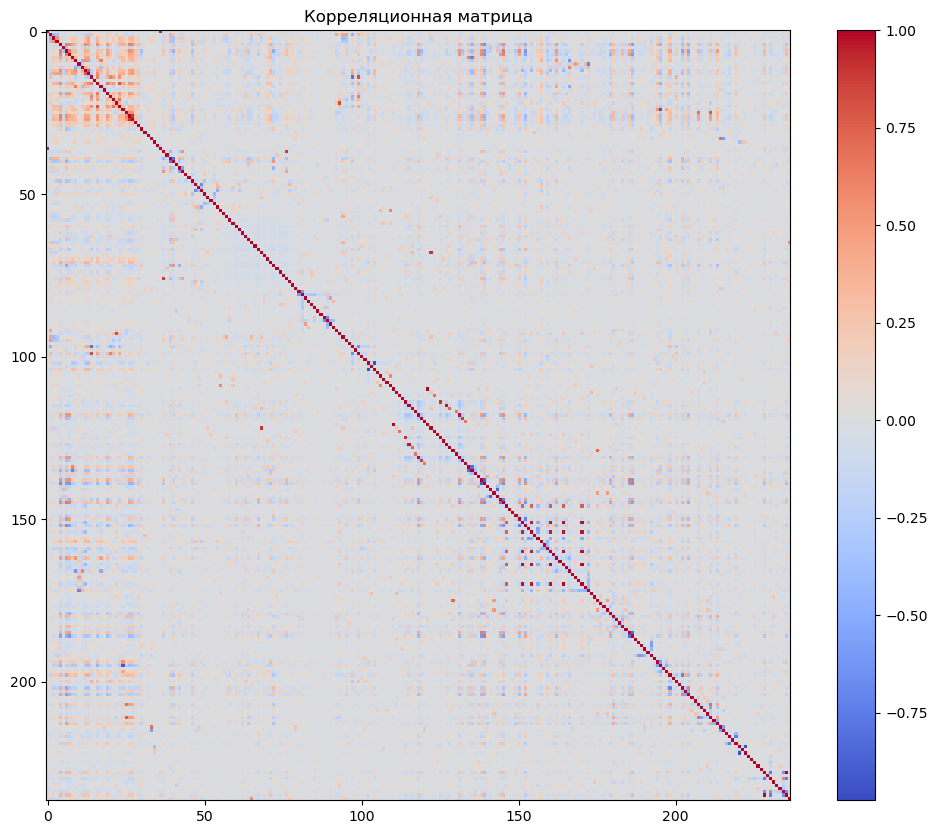

In [20]:
# Корреляционная матрица для всех числовых признаков
correlation_matrix = test_df.corr()

# Отображение матрицы корреляции с увеличением значений
plt.figure(figsize=(12, 10))
plt.title('Корреляционная матрица')
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.show()

Ну вот уже что-то изменилось, попробуем ещё что-нибудь найти для тренеровки

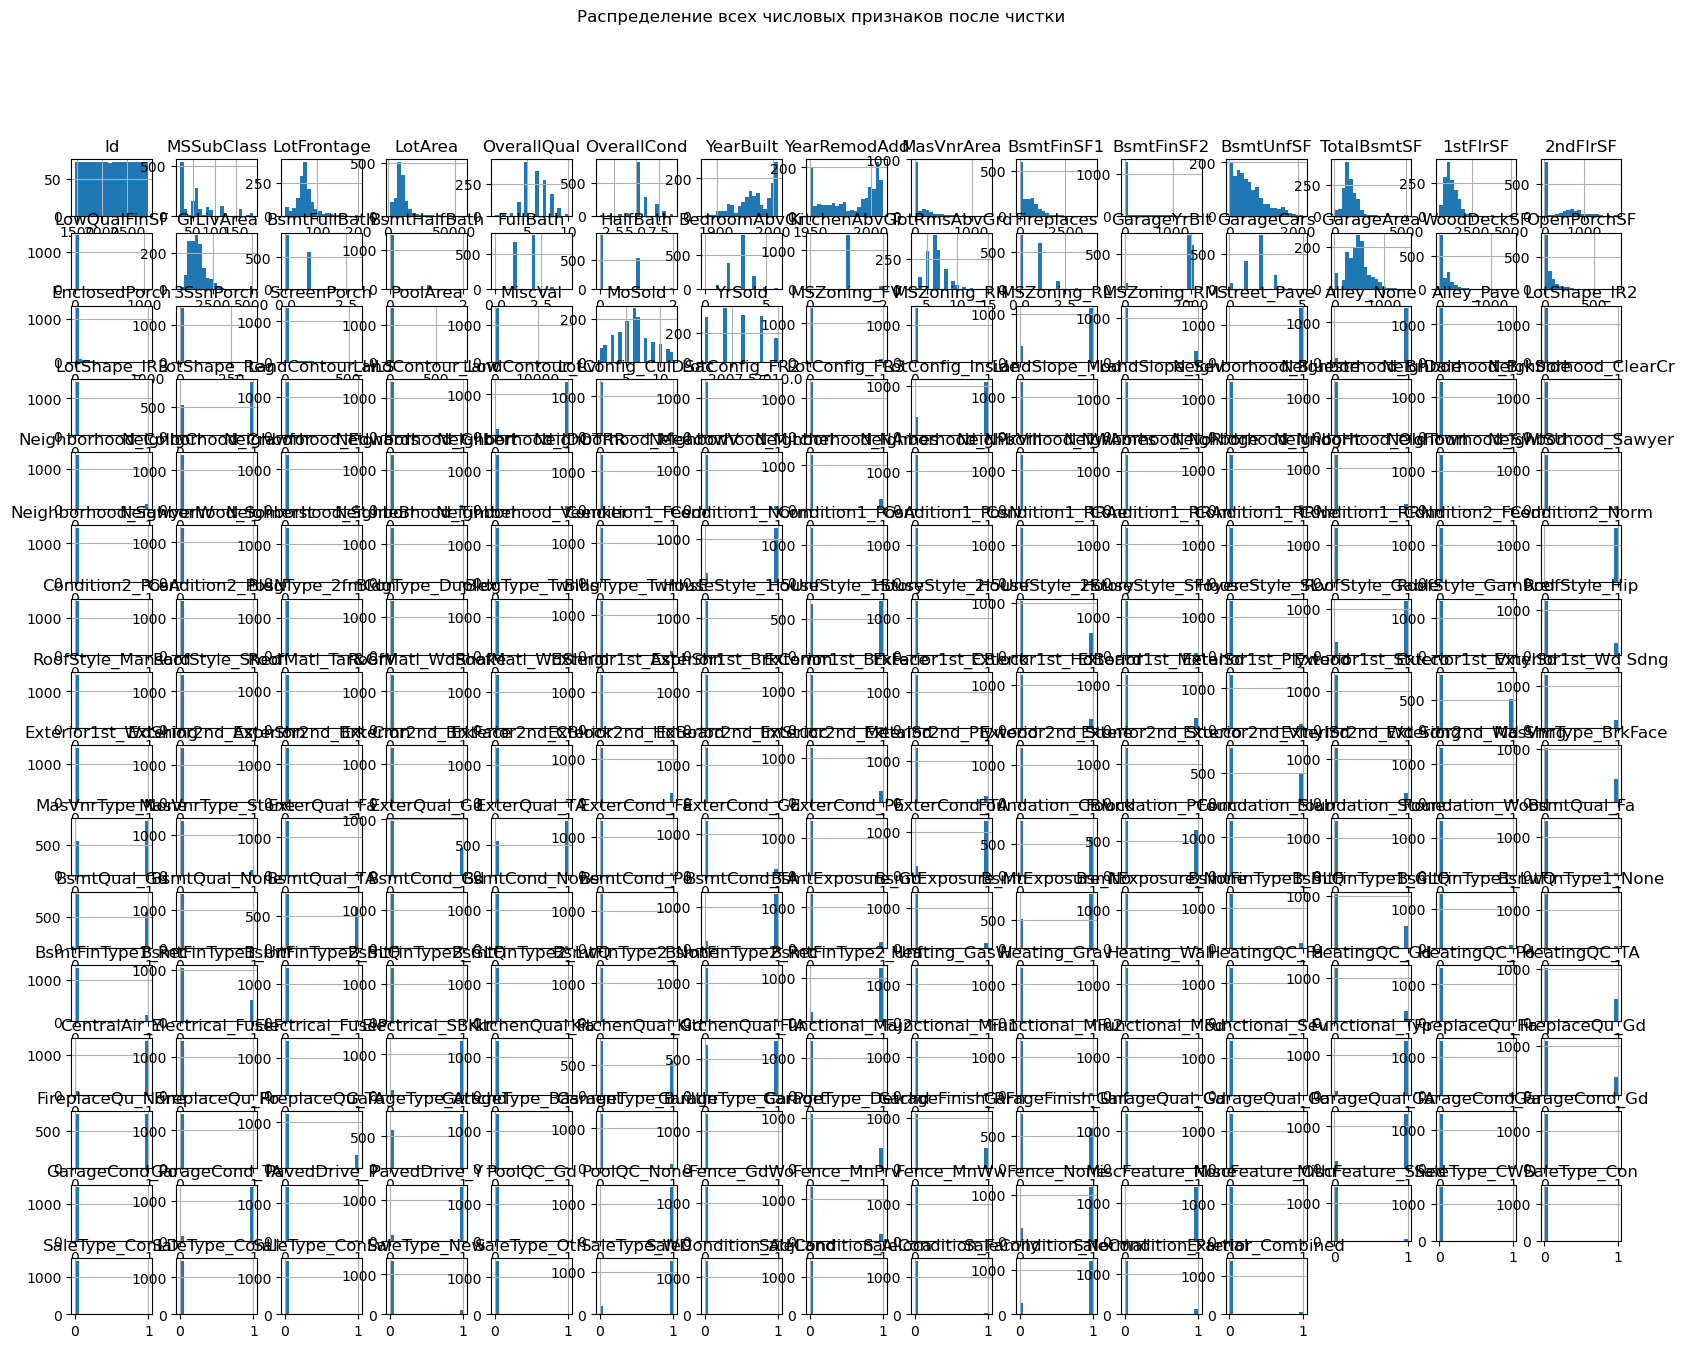

In [21]:
# Построим гистограммы для всех оставшихся числовых признаков
test_df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Распределение всех числовых признаков после чистки')
plt.show()

In [22]:
# Пересчитаем корреляции после чистки
correlation_matrix = test_df.corr()

# Найдем другие коррелированные признаки
corr_pairs = correlation_matrix.unstack().abs().sort_values(ascending=False)

# Убираем дубликаты (корреляция признака с самим собой)
corr_pairs = corr_pairs[corr_pairs != 1]

# Выводим топ-10 наибольших корреляций между признаками
corr_pairs.head(10)


SaleCondition_Partial  SaleType_New             0.986317
SaleType_New           SaleCondition_Partial    0.986317
Exterior1st_VinylSd    Exterior2nd_VinylSd      0.978917
Exterior2nd_VinylSd    Exterior1st_VinylSd      0.978917
BsmtFinType2_None      BsmtQual_None            0.976319
BsmtQual_None          BsmtFinType2_None        0.976319
                       BsmtFinType1_None        0.976319
BsmtFinType1_None      BsmtQual_None            0.976319
BsmtFinType2_None      BsmtExposure_None        0.976319
BsmtFinType1_None      BsmtExposure_None        0.976319
dtype: float64

Попробуем ещё BsmtFinSF1 и BsmtFinSF2 + FireplaceQu_None и Fireplaces

In [23]:
# Создаем новый признак для общей площади законченных помещений в подвале
test_df['TotalBsmtFinishedSF'] = test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

# Удаляем исходные признаки
test_df = test_df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2'])

# Проверка изменений
test_df[['TotalBsmtFinishedSF']].head()

,TotalBsmtFinishedSF
0,612.0
1,923.0
2,791.0
3,602.0
4,263.0


In [24]:
# Создаем бинарный признак для наличия камина
test_df['HasFireplace'] = test_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Удаляем исходные признаки
test_df = test_df.drop(columns=['Fireplaces', 'FireplaceQu_None'])

# Проверка изменений
test_df[['HasFireplace']].head()


,HasFireplace
0,0
1,0
2,1
3,1
4,0


* Новый признак TotalBsmtFinishedSF будет отображать общую площадь законченных помещений в подвале.
* Новый бинарный признак HasFireplace будет указывать на наличие камина.

# **Проектирование признаков**

## **Напрашивается возраст дома**

In [26]:
# Создаем признак для возраста дома на момент продажи
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

# Проверка изменений
test_df[['HouseAge']].head()

,HouseAge
0,49
1,52
2,13
3,12
4,18


## **Чуть более несбалансированный, но будто тоже вписывающийся признак Общая площадь дома, как просили в ДЗ**

In [27]:
# Создаем новый признак для общей площади дома
test_df['TotalHouseArea'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['GrLivArea']

# Проверка изменений
test_df[['TotalHouseArea']].head()


,TotalHouseArea
0,2674.0
1,3987.0
2,4186.0
3,4134.0
4,3840.0


## **Проверим категориальные переменные на последок**

In [28]:
# Проверим, остались ли в датасете категориальные переменные
categorical_cols = test_df.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

Ну тут всё хорошо.

Дисклеймер, т.к. при выполнении первого шага проводился анализ сетя Test, в котором нет sale price, то и анализ ее провести мы не можем. Опять же, в ДЗ не было написано какой файл для работы брать, поэтому пришлось экспериментировать. В любом случае, так показалось интереснее.

# **Сохраняем нашу красоту**

In [29]:
# Сохранение очищенного и преобразованного набора данных
test_df.to_csv(r'C:\Users\User\Desktop\Get_n_mark_data\task8\cleaned_house_prices.csv', index=False)